# Step 1: Load and Merge All Files

In [1]:
# Step 1: Import libraries
import pandas as pd

# Step 2: Load all 3 CSV files
df1 = pd.read_csv("Auto_Insurance_Fraud_Claims_File01.csv")
df2 = pd.read_csv("Auto_Insurance_Fraud_Claims_File02.csv")
df3 = pd.read_csv("Auto_Insurance_Fraud_Claims_File03.csv")

# Step 3: Check shape of each file
print("File 01:", df1.shape)
print("File 02:", df2.shape)
print("File 03:", df3.shape)

# Step 4: Concatenate all into a single DataFrame
df = pd.concat([df1, df2, df3], axis=0, ignore_index=True)

# Step 5: View basic info
print("Combined Shape:", df.shape)
df.head()


File 01: (40000, 53)
File 02: (20000, 53)
File 03: (10000, 52)
Combined Shape: (70000, 53)


,Claim_ID,Bind_Date1,Customer_Life_Value1,Age_Insured,Policy_Num,Policy_State,Policy_Start_Date,Policy_Expiry_Date,Policy_BI,Policy_Ded,...,DiffIN_Mileage,Low_Mileage_Discount,Fraud_Ind,Commute_Discount,Total_Claim,Injury_Claim,Property_Claim,Vehicle_Claim,Vehicle_Registration,Check_Point
0,AA00000001,1/1/2023,12,28,123790687,OH,10/13/2023,4/13/2024,500/1000,1000,...,2499,0,N,0,6162.56,714.94,5370.74,76.88,IF47V1395,No
1,AA00000002,1/1/2023,12,31,129044473,IL,10/21/2023,4/21/2024,250/500,500,...,4242,1,N,0,20402.38,7669.31,5708.22,7024.85,EI51L7783,No
2,AA00000003,7/1/2022,18,50,146863149,OH,11/26/2023,5/26/2024,500/1000,500,...,2346,0,N,0,10839.12,3646.11,3468.94,3724.07,MU37B8905,No
3,AA00000004,1/1/2023,12,37,163100869,IL,8/8/2023,2/8/2024,500/1000,1000,...,2425,0,Y,0,17423.88,5585.62,1863.46,9974.80,RI52Q2108,No
4,AA00000005,3/1/2022,22,28,185582958,OH,11/12/2023,5/12/2024,250/500,1000,...,3890,1,N,0,24527.38,7224.79,3074.12,14228.47,UX39O9355,No


# Step 2: Basic Cleaning & Date Parsing

In [2]:
# Convert date columns to datetime
date_cols = ['Bind_Date1', 'Policy_Start_Date', 'Policy_Expiry_Date',
             'Accident_Date', 'DL_Expiry_Date', 'Claims_Date']

for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Convert target column 'Fraud_Ind' to 0/1
df['Fraud_Ind'] = df['Fraud_Ind'].map({'Y': 1, 'N': 0})

# Check missing values
missing = df.isnull().sum().sort_values(ascending=False)
print("Top Missing Columns:\n", missing.head(10))


Top Missing Columns:
 Police_Report            24138
Fraud_Ind                10000
authorities_contacted     6782
Bind_Date1                   0
Claim_ID                     0
Policy_State                 0
Policy_Start_Date            0
Policy_Expiry_Date           0
Policy_BI                    0
Policy_Ded                   0
dtype: int64


a. Handle Missing Values

In [3]:
# Check missing values again
print(df.isnull().sum())

# Simple strategy: fill numeric columns with median, categorical with mode
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

# Confirm no missing values
print(df.isnull().sum().sum(), "missing values remaining")

Claim_ID                        0
Bind_Date1                      0
Customer_Life_Value1            0
Age_Insured                     0
Policy_Num                      0
Policy_State                    0
Policy_Start_Date               0
Policy_Expiry_Date              0
Policy_BI                       0
Policy_Ded                      0
Policy_Premium                  0
Umbrella_Limit                  0
Insured_Zip                     0
Gender                          0
Education                       0
Occupation                      0
Hobbies                         0
Insured_Relationship            0
Capital_Gains                   0
Capital_Loss                    0
Garage_Location                 0
Accident_Date                   0
Accident_Type                   0
Collision_Type                  0
Accident_Severity               0
authorities_contacted        6782
Acccident_State                 0
Acccident_City                  0
Accident_Location               0
Accident_Hour 

C:\Users\rajat\AppData\Local\Temp\ipykernel_23168\3339425598.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\rajat\AppData\Local\Temp\ipykernel_23168\3339425598.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

0 missing values remaining


C:\Users\rajat\AppData\Local\Temp\ipykernel_23168\3339425598.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


b. Encode Categorical Variables

# Step 3: KPI Extraction (Exploratory Metrics)

In [4]:
print("📊 KPI Dashboard for Auto Insurance Fraud Dataset\n")

# 1. Total number of claims
total_claims = df.shape[0]
print(f"1. Total Claims: {total_claims}")

# 2. Number of fraudulent claims
fraud_claims = df['Fraud_Ind'].sum()
print(f"2. Fraudulent Claims: {fraud_claims}")

# 3. Fraud Rate (%)
fraud_rate = round(fraud_claims / total_claims * 100, 2)
print(f"3. Fraud Rate: {fraud_rate}%")

# 4. Average Total Claim Amount
avg_total_claim = df['Total_Claim'].mean()
print(f"4. Average Total Claim Amount: ₹{avg_total_claim:.2f}")

# 5. Average Claim Amount - Fraud vs Non-Fraud
avg_fraud_claim = df[df['Fraud_Ind'] == 1]['Total_Claim'].mean()
avg_nonfraud_claim = df[df['Fraud_Ind'] == 0]['Total_Claim'].mean()
print(f"5. Avg Fraudulent Claim: ₹{avg_fraud_claim:.2f}")
print(f"   Avg Non-Fraud Claim: ₹{avg_nonfraud_claim:.2f}")

# 6. Top 5 Accident Types by Fraud Count
top_fraud_acc_types = df[df['Fraud_Ind'] == 1]['Accident_Type'].value_counts().head(5)
print("\n6. Top 5 Accident Types in Fraud Cases:\n", top_fraud_acc_types)

# 7. Claims by Policy State (Top 5)
top_states = df['Policy_State'].value_counts().head(5)
print("\n7. Top 5 Policy States by Number of Claims:\n", top_states)

# 8. Police Report Filing vs Fraud
report_vs_fraud = df.groupby(['Police_Report'])['Fraud_Ind'].mean()
print("\n8. Fraud Rate by Police Report Filed:\n", report_vs_fraud)

# 9. Avg Customer Life Value - Fraud vs Non-Fraud
avg_clv_fraud = df[df['Fraud_Ind'] == 1]['Customer_Life_Value1'].mean()
avg_clv_nonfraud = df[df['Fraud_Ind'] == 0]['Customer_Life_Value1'].mean()
print(f"\n9. Avg Customer Life Value (Fraud): ₹{avg_clv_fraud:.2f}")
print(f"   Avg Customer Life Value (Non-Fraud): ₹{avg_clv_nonfraud:.2f}")

# 10. Avg Days Between Accident & Claim
df['Accident_to_Claim_Days'] = (df['Claims_Date'] - df['Accident_Date']).dt.days
avg_delay = df['Accident_to_Claim_Days'].mean()
print(f"\n10. Average Delay Between Accident & Claim Filing: {avg_delay:.2f} days")


📊 KPI Dashboard for Auto Insurance Fraud Dataset

1. Total Claims: 70000
2. Fraudulent Claims: 15200.0
3. Fraud Rate: 21.71%
4. Average Total Claim Amount: ₹13966.52
5. Avg Fraudulent Claim: ₹14019.17
   Avg Non-Fraud Claim: ₹13951.92

6. Top 5 Accident Types in Fraud Cases:
 Accident_Type
Single Vehicle Collision    7165
Multi-vehicle Collision     7021
Parked Car                   546
Vehicle Theft                468
Name: count, dtype: int64

7. Top 5 Policy States by Number of Claims:
 Policy_State
OH    24737
IL    23727
IN    21536
Name: count, dtype: int64

8. Fraud Rate by Police Report Filed:
 Police_Report
NO     0.221984
YES    0.206485
Name: Fraud_Ind, dtype: float64

9. Avg Customer Life Value (Fraud): ₹18.00
   Avg Customer Life Value (Non-Fraud): ₹17.99

10. Average Delay Between Accident & Claim Filing: 2.58 days


# Step 4: Exploratory Data Analysis (EDA)


Step 4.1: Import Required Libraries

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Set default style
sns.set(style="whitegrid")

Step 4.2: Class Balance (Fraud vs Non-Fraud)

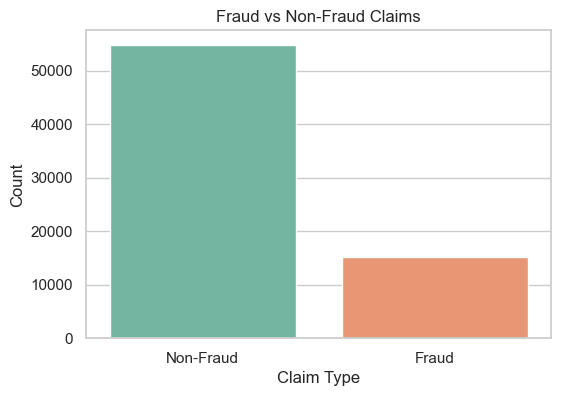

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x='Fraud_Ind', data=df, palette='Set2')
plt.title("Fraud vs Non-Fraud Claims")
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.xlabel("Claim Type")
plt.ylabel("Count")
plt.show()

Step 4.3: Claim Amount Distribution by Fraud Status

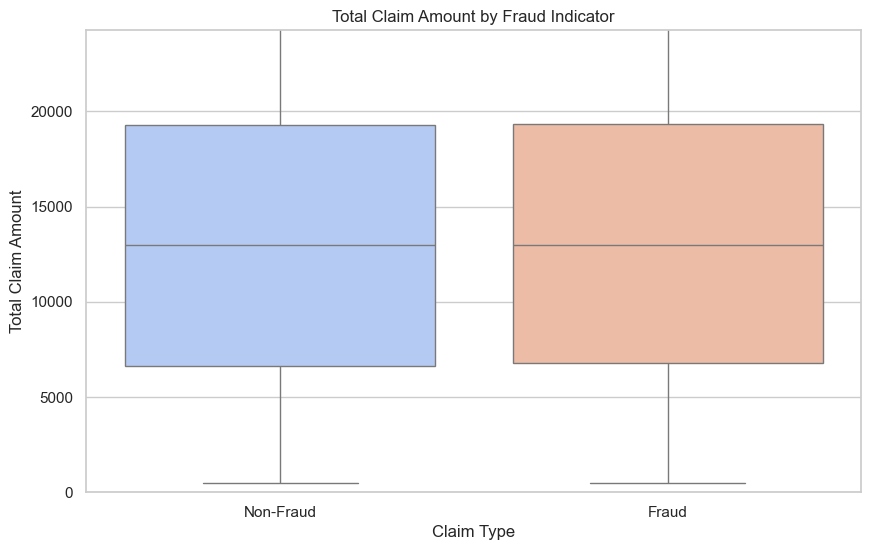

In [7]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Fraud_Ind', y='Total_Claim', data=df, palette='coolwarm')
plt.title("Total Claim Amount by Fraud Indicator")
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.xlabel("Claim Type")
plt.ylabel("Total Claim Amount")
plt.ylim(0, df['Total_Claim'].quantile(0.95))  # Remove outliers
plt.show()

Step 4.4: Accident Type vs Fraud

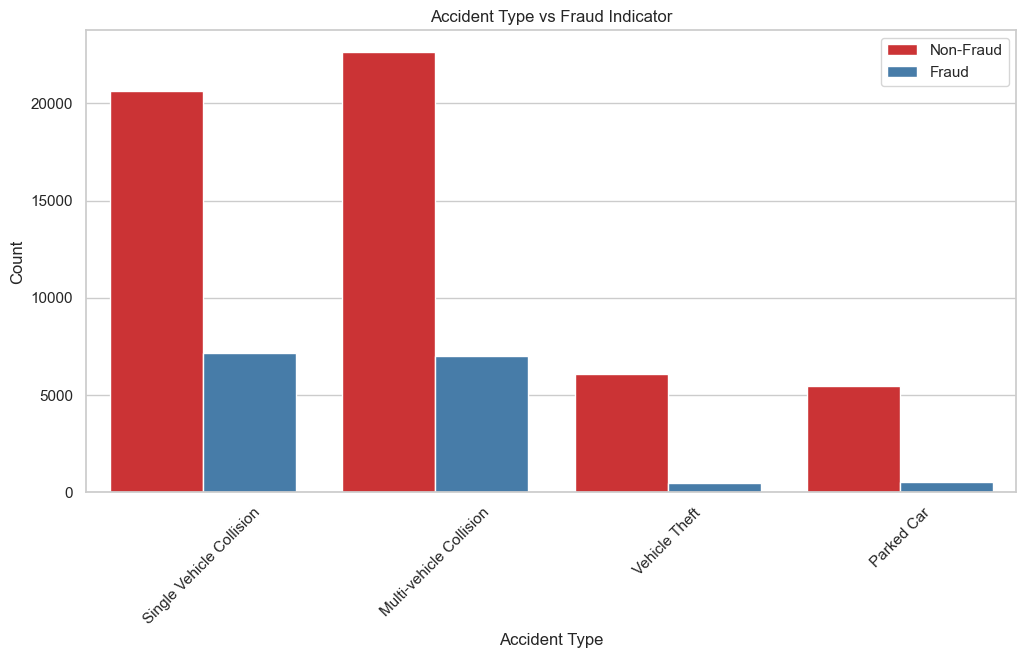

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Accident_Type', hue='Fraud_Ind', palette='Set1')
plt.title("Accident Type vs Fraud Indicator")
plt.xticks(rotation=45)
plt.xlabel("Accident Type")
plt.ylabel("Count")
plt.legend(['Non-Fraud', 'Fraud'])
plt.show()

Step 4.5: Correlation Heatmap (Numerical Features)

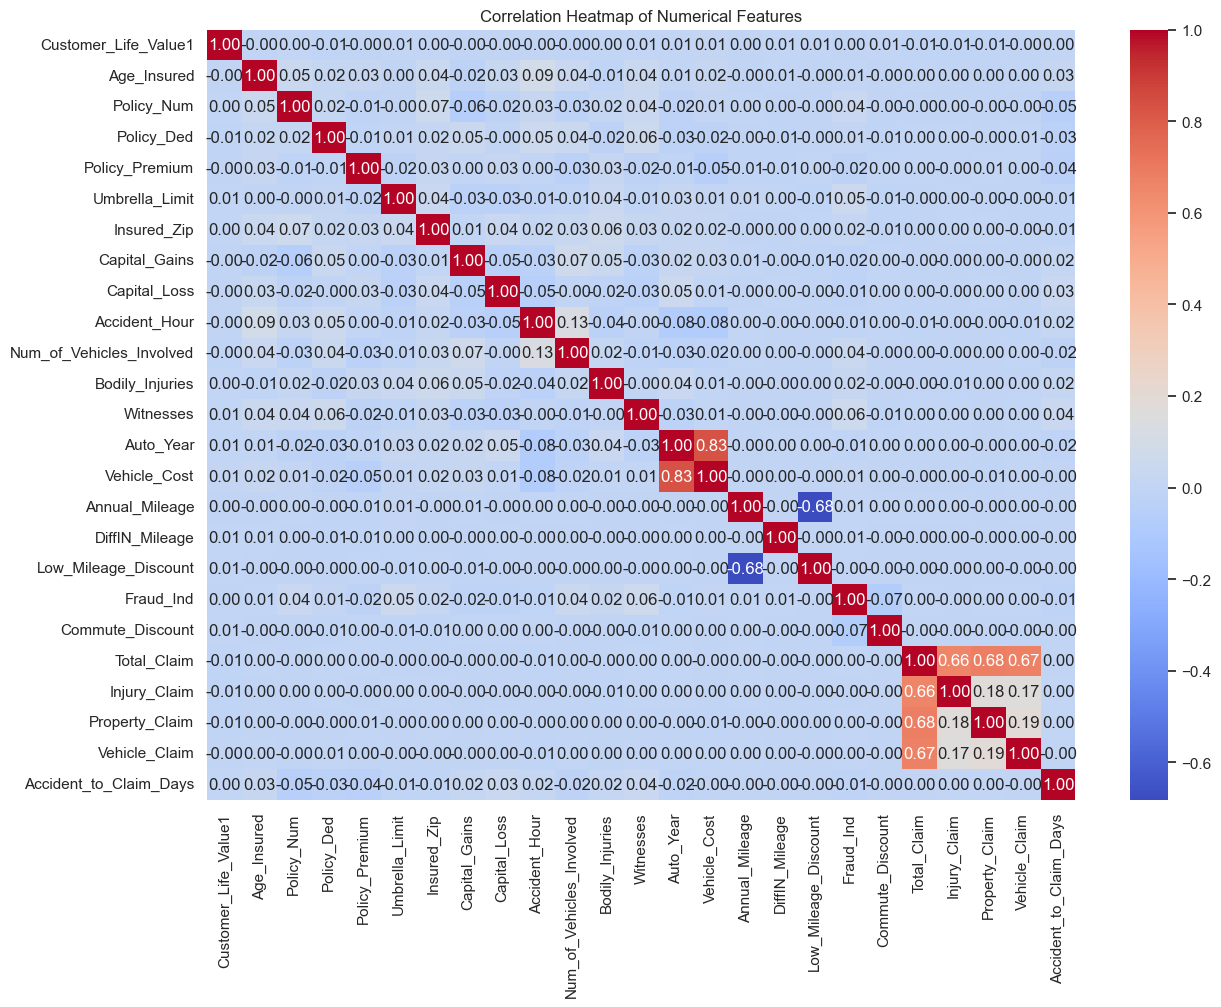

In [9]:
# Select numerical features
num_cols = df.select_dtypes(include='number')

plt.figure(figsize=(14,10))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

Step 4.6: Fraud Rate by Police Report Availability

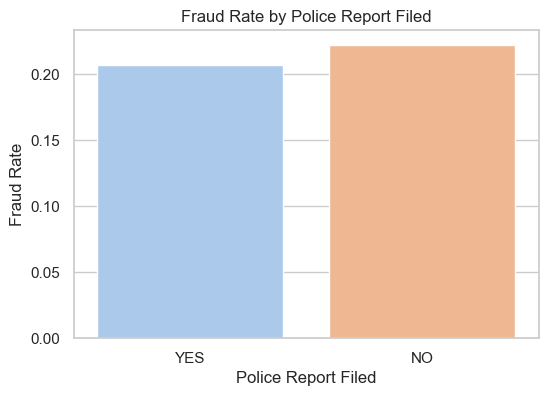

In [10]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Police_Report', y='Fraud_Ind', ci=None, palette='pastel')
plt.title("Fraud Rate by Police Report Filed")
plt.xlabel("Police Report Filed")
plt.ylabel("Fraud Rate")
plt.show()

Step 4.7: Vehicle Year vs Fraud Count

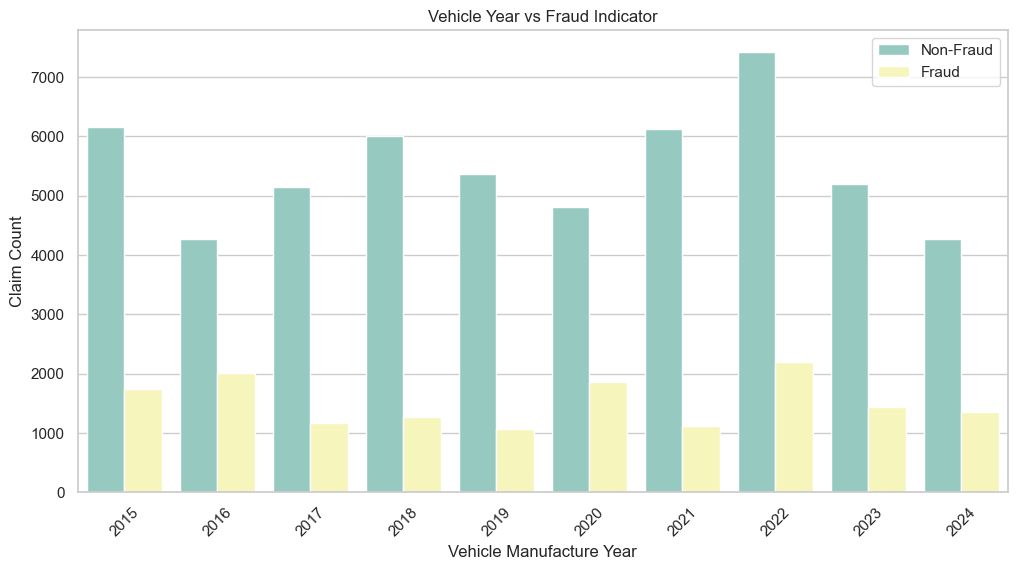

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Auto_Year', hue='Fraud_Ind', palette='Set3')
plt.title("Vehicle Year vs Fraud Indicator")
plt.xticks(rotation=45)
plt.xlabel("Vehicle Manufacture Year")
plt.ylabel("Claim Count")
plt.legend(['Non-Fraud', 'Fraud'])
plt.show()

# Step 5: Feature Engineering & Encoding

Step 5.1: Fill or Drop Missing Values

In [12]:
# Fill missing categorical values with 'Unknown' or 'No'
categorical_cols = ['Police_Report', 'authorities_contacted', 'Property_Damage']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')

# Fill numeric NaNs with 0 (for claim amounts)
df['Total_Claim'] = df['Total_Claim'].fillna(0)
df['Injury_Claim'] = df['Injury_Claim'].fillna(0)
df['Property_Claim'] = df['Property_Claim'].fillna(0)
df['Vehicle_Claim'] = df['Vehicle_Claim'].fillna(0)

# Drop rows where target variable is missing
df = df[~df['Fraud_Ind'].isna()]
# df

Step 5.2: Create New Features


In [13]:
# Days between policy start and claim date
df['Policy_to_Claim_Days'] = (df['Claims_Date'] - df['Policy_Start_Date']).dt.days

# Days between accident and claim
df['Accident_to_Claim_Days'] = (df['Claims_Date'] - df['Accident_Date']).dt.days

# Vehicle Age
df['Vehicle_Age'] = df['Claims_Date'].dt.year - df['Auto_Year']

# Is Weekend Accident
df['Weekend_Accident'] = df['Accident_Date'].dt.dayofweek >= 5

Step 5.3: Encode Categorical Features

In [14]:
from sklearn.preprocessing import LabelEncoder

# Binary encode simple yes/no fields
binary_cols = ['Police_Report', 'authorities_contacted', 'Low_Mileage_Discount', 'Commute_Discount', 'Property_Damage']
for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].map({'Yes': 1, 'No': 0, 'Y': 1, 'N': 0, 'Unknown': -1})

# One-hot encode multi-class categorical features
one_hot_cols = ['Accident_Type', 'Collision_Type', 'Policy_State', 'Acccident_City', 'Garage_Location',
                'Vehicle_Color', 'Gender', 'Education', 'Occupation', 'Hobbies', 'Auto_Make']

df_encoded = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)
# df_encoded.head()

Step 5.4: Select Final Features and Target

In [15]:
# Drop unused or identifier columns
drop_cols = ['Claim_ID', 'Policy_Num', 'Vehicle_Registration', 'Check_Point',
             'Accident_Date', 'Claims_Date', 'Policy_Start_Date', 'Policy_Expiry_Date', 
             'DL_Expiry_Date', 'Bind_Date1']

df_encoded.drop(columns=[col for col in drop_cols if col in df_encoded.columns], inplace=True)

# Final features and target
X = df_encoded.drop(columns=['Fraud_Ind'])
y = df_encoded['Fraud_Ind']

print("✅ Final Feature Set Shape:", X.shape)

✅ Final Feature Set Shape: (70000, 107)


In [16]:
# Final features and target
X = df_encoded.drop(columns=['Fraud_Ind'])
y = df_encoded['Fraud_Ind']

In [17]:
# Convert Policy_BI (like '500/1000') to numeric average
def convert_range_to_mean(val):
    try:
        parts = val.split('/')
        return (int(parts[0]) + int(parts[1])) / 2
    except:
        return None

if 'Policy_BI' in df_encoded.columns:
    df_encoded['Policy_BI'] = df_encoded['Policy_BI'].apply(convert_range_to_mean)

# Drop Accident_Location (too granular)
if 'Accident_Location' in df_encoded.columns:
    df_encoded.drop(columns=['Accident_Location'], inplace=True)

# One-hot encode the remaining object columns
df_encoded = pd.get_dummies(df_encoded, columns=[
    'Insured_Relationship',
    'Accident_Severity',
    'Acccident_State',
    'Auto_Model'
], drop_first=True)

# ✅ Now extract final features and target
X = df_encoded.drop(columns=['Fraud_Ind'])
y = df_encoded['Fraud_Ind']

# Confirm it's clean
print("✅ Ready for modeling. Non-numeric columns remaining:", X.select_dtypes(include='object').columns.tolist())


✅ Ready for modeling. Non-numeric columns remaining: []


In [18]:
# Convert date columns to datetime
date_cols = ['Bind_Date1', 'Policy_Start_Date', 'Policy_Expiry_Date',
             'Accident_Date', 'DL_Expiry_Date', 'Claims_Date']

for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Convert target column 'Fraud_Ind' to 0/1
df['Fraud_Ind'] = df['Fraud_Ind'].map({'Y': 1, 'N': 0})

# Check missing values
missing = df.isnull().sum().sort_values(ascending=False)
print("Top Missing Columns:\n", missing.head(10))


Top Missing Columns:
 authorities_contacted    70000
Low_Mileage_Discount     70000
Fraud_Ind                70000
Police_Report            70000
Commute_Discount         70000
Property_Damage          44390
Customer_Life_Value1         0
Bind_Date1                   0
Claim_ID                     0
Policy_Ded                   0
dtype: int64


In [19]:
# Convert date columns to datetime
date_cols = ['Bind_Date1', 'Policy_Start_Date', 'Policy_Expiry_Date',
             'Accident_Date', 'DL_Expiry_Date', 'Claims_Date']

for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Convert target column 'Fraud_Ind' to 0/1
df['Fraud_Ind'] = df['Fraud_Ind'].map({'Y': 1, 'N': 0})

# Check missing values
missing = df.isnull().sum().sort_values(ascending=False)
print("Top Missing Columns:\n", missing.head(10))


Top Missing Columns:
 authorities_contacted    70000
Low_Mileage_Discount     70000
Fraud_Ind                70000
Police_Report            70000
Commute_Discount         70000
Property_Damage          44390
Customer_Life_Value1         0
Bind_Date1                   0
Claim_ID                     0
Policy_Ded                   0
dtype: int64


# Step 6: Model Building & Evaluation

Step 6.1: Train-Test Split

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Step 6.2: Logistic Regression (Baseline)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97     10960
         1.0       0.87      0.95      0.91      3040

    accuracy                           0.96     14000
   macro avg       0.93      0.96      0.94     14000
weighted avg       0.96      0.96      0.96     14000

[[10536   424]
 [  139  2901]]


In [22]:
# Cell 1
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd


Define all model

In [27]:
# Cell 2
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

train each model

In [24]:
from sklearn.impute import SimpleImputer

# Create imputer object
imputer = SimpleImputer(strategy='mean')  # or strategy='median' / 'most_frequent'

# Fit on training data and transform both train & test
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [25]:
# Cell 3
results = []

for name, model in models.items():
    print(f"==================== {name} ====================")
    
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
    # Save results
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": report['weighted avg']['precision'],
        "Recall": report['weighted avg']['recall'],
        "F1-Score": report['weighted avg']['f1-score']
    })
    
    print("\n\n")


==================== Logistic Regression ====================
Accuracy: 0.7828571428571428

Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      1.00      0.88     10960
         1.0       0.00      0.00      0.00      3040

    accuracy                           0.78     14000
   macro avg       0.39      0.50      0.44     14000
weighted avg       0.61      0.78      0.69     14000


Confusion Matrix:
 [[10960     0]
 [ 3040     0]]



==================== Decision Tree ====================
Accuracy: 0.9512857142857143

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.97      0.97     10960
         1.0       0.90      0.88      0.89      3040

    accuracy                           0.95     14000
   macro avg       0.93      0.92      0.93     14000
weighted avg       0.95      0.95      0.95     14000


Confusion Matrix:
 [[10652   308]
 [  374  2666]]



============

  File "c:\Users\rajat\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\rajat\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\rajat\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                

Accuracy: 0.9032142857142857

Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.95      0.94     10960
         1.0       0.80      0.74      0.77      3040

    accuracy                           0.90     14000
   macro avg       0.86      0.84      0.85     14000
weighted avg       0.90      0.90      0.90     14000


Confusion Matrix:
 [[10399   561]
 [  794  2246]]



==================== Support Vector Machine ====================
Accuracy: 0.7828571428571428

Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      1.00      0.88     10960
         1.0       0.00      0.00      0.00      3040

    accuracy                           0.78     14000
   macro avg       0.39      0.50      0.44     14000
weighted avg       0.61      0.78      0.69     14000


Confusion Matrix:
 [[10960     0]
 [ 3040     0]]



==================== Naive Bayes ====================
Accuracy: 0

In [30]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Optional external boosting models
# !pip install xgboost lightgbm
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Bagging & Boosting models
boosting_models = {
    "Bagging (DT)": BaggingClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier()
}


In [46]:
import joblib

for name, model in boosting_models.items():
    print(f"==================== {name} ====================")
    
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n\n")

    # Save metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": report['weighted avg']['precision'],
        "Recall": report['weighted avg']['recall'],
        "F1-Score": report['weighted avg']['f1-score']
    })

    # ✅ Save model to file (convert name to filename-friendly format)
    filename = f"{name.replace(' ', '_').replace('(', '').replace(')', '')}.pkl"
    joblib.dump(model, filename)
    print(f"Model saved to: {filename}\n")


==================== Bagging (DT) ====================
Accuracy: 0.9577857142857142

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.96      0.97     10960
         1.0       0.87      0.94      0.91      3040

    accuracy                           0.96     14000
   macro avg       0.93      0.95      0.94     14000
weighted avg       0.96      0.96      0.96     14000


Confusion Matrix:
 [[10540   420]
 [  171  2869]]



Model saved to: Bagging_DT.pkl

==================== AdaBoost ====================
Accuracy: 0.8175714285714286

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.95      0.89     10960
         1.0       0.64      0.36      0.46      3040

    accuracy                           0.82     14000
   macro avg       0.74      0.65      0.67     14000
weighted avg       0.80      0.82      0.80     14000


Confusion Matrix:
 [[10360   600]
 [ 1954  10

# saved model


In [48]:
# Load specific model
from joblib import load
model = load('Bagging_DT.pkl')

# Predict
y_pred = model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97     10960
         1.0       0.87      0.94      0.91      3040

    accuracy                           0.96     14000
   macro avg       0.93      0.95      0.94     14000
weighted avg       0.96      0.96      0.96     14000



In [60]:
print(X.columns.tolist())

['Customer_Life_Value1', 'Age_Insured', 'Policy_BI', 'Policy_Ded', 'Policy_Premium', 'Umbrella_Limit', 'Insured_Zip', 'Capital_Gains', 'Capital_Loss', 'authorities_contacted', 'Accident_Hour', 'Num_of_Vehicles_Involved', 'Property_Damage', 'Bodily_Injuries', 'Witnesses', 'Police_Report', 'Auto_Year', 'Vehicle_Cost', 'Annual_Mileage', 'DiffIN_Mileage', 'Low_Mileage_Discount', 'Commute_Discount', 'Total_Claim', 'Injury_Claim', 'Property_Claim', 'Vehicle_Claim', 'Accident_to_Claim_Days', 'Policy_to_Claim_Days', 'Vehicle_Age', 'Weekend_Accident', 'Accident_Type_Parked Car', 'Accident_Type_Single Vehicle Collision', 'Accident_Type_Vehicle Theft', 'Collision_Type_Rear Collision', 'Collision_Type_Side Collision', 'Collision_Type_Unknown', 'Policy_State_IN', 'Policy_State_OH', 'Acccident_City_Columbus', 'Acccident_City_Hillsdale', 'Acccident_City_Northbend', 'Acccident_City_Northbrook', 'Acccident_City_Riverwood', 'Acccident_City_Springfield', 'Garage_Location_Yes', 'Vehicle_Color_Blue', 'Vehi

In [67]:
print(f"🔢 Length of test_sample: {len(test_sample)}")
print(f"📄 Number of features in feature_names: {len(feature_names)}")


🔢 Length of test_sample: 155
📄 Number of features in feature_names: 154


In [68]:
max_len = max(len(test_sample), len(feature_names))
for i in range(max_len):
    val = test_sample[i] if i < len(test_sample) else "❌ MISSING"
    fname = feature_names[i] if i < len(feature_names) else "❌ EXTRA VALUE"
    print(f"{i:>3}: Feature = {fname:<25} | Value = {val}")

  0: Feature = Customer_Life_Value1      | Value = 50000
  1: Feature = Age_Insured               | Value = 45
  2: Feature = Policy_BI                 | Value = 250000
  3: Feature = Policy_Ded                | Value = 500
  4: Feature = Policy_Premium            | Value = 1200
  5: Feature = Umbrella_Limit            | Value = 1000000
  6: Feature = Insured_Zip               | Value = 43000
  7: Feature = Capital_Gains             | Value = 0
  8: Feature = Capital_Loss              | Value = 0
  9: Feature = authorities_contacted     | Value = 1
 10: Feature = Accident_Hour             | Value = 14
 11: Feature = Num_of_Vehicles_Involved  | Value = 2
 12: Feature = Property_Damage           | Value = 0
 13: Feature = Bodily_Injuries           | Value = 1
 14: Feature = Witnesses                 | Value = 1
 15: Feature = Police_Report             | Value = 1
 16: Feature = Auto_Year                 | Value = 2015
 17: Feature = Vehicle_Cost              | Value = 40000
 18: Feature 

# testing


In [ ]:
import numpy as np
import pandas as pd
import joblib

# Load the model
model = joblib.load('Bagging_DT.pkl')

# Use the same feature names you used for training
feature_names = X.columns.tolist()  # Already verified by you (150 features)

# Step 1: Create a sample test input (ensure same order and number of features)
# You can replace the values below with actual user input or test values
test_sample = [
    50000, 45, 250000, 500, 1200, 1000000, 43000, 0, 0, 1, 14, 2, 0, 1, 1, 1, 2015,
    40000, 12000, 10000, 1, 0, 15000, 5000, 4000, 6000, 10, 100, 5, 1, 0, 0, 1, 0,
    1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
    0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
    0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
    1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
    1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1
]

# Step 2: Confirm shape matches
assert len(test_sample) == len(feature_names), "Test sample does not match feature length!"

# Step 3: Convert to DataFrame
test_df = pd.DataFrame([test_sample], columns=feature_names)

# Step 4: Predict
prediction = model.predict(test_df)[0]
print("🔮 Predicted Class:", prediction)

# Optionally get probabilities
if hasattr(model, "predict_proba"):
    probas = model.predict_proba(test_df)[0]
    print("📊 Class Probabilities:", dict(zip(model.classes_, probas)))


AssertionError: Test sample does not match feature length!